In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6b
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [23]:
tel = pd.read_csv('data/tel_data_전처리.csv')

In [69]:
tel

,고객ID,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,인터넷서비스유형,온라인보안서비스여부,...,TV스트리밍이용여부,영화스트리밍이용여부,계약기간유형,전자청구서이용여부,결제방법,월요금,총요금,이탈여부,인터넷서비스가입여부,개월수*월요금
0,7590-VHVEG,False,False,True,False,1,False,False,DSL,False,...,False,False,Month-to-month,True,Electronic check,29.85,29.85,False,True,29.85
1,5575-GNVDE,True,False,False,False,34,True,False,DSL,True,...,False,False,One year,False,Mailed check,56.95,1889.50,False,True,1936.30
2,3668-QPYBK,True,False,False,False,2,True,False,DSL,True,...,False,False,Month-to-month,True,Mailed check,53.85,108.15,True,True,107.70
3,7795-CFOCW,True,False,False,False,45,False,False,DSL,True,...,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False,True,1903.50
4,9237-HQITU,False,False,False,False,2,True,False,Fiber optic,False,...,False,False,Month-to-month,True,Electronic check,70.70,151.65,True,True,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,False,True,True,24,True,True,DSL,True,...,True,True,One year,True,Mailed check,84.80,1990.50,False,True,2035.20
7039,2234-XADUH,False,False,True,True,72,True,True,Fiber optic,False,...,True,True,One year,True,Credit card (automatic),103.20,7362.90,False,True,7430.40
7040,4801-JZAZL,False,False,True,True,11,False,False,DSL,True,...,False,False,Month-to-month,True,Electronic check,29.60,346.45,False,True,325.60
7041,8361-LTMKD,True,True,True,False,4,True,True,Fiber optic,False,...,False,False,Month-to-month,True,Mailed check,74.40,306.60,True,True,297.60


In [27]:
demographics = pd.read_csv('data/churn_demographics_전처리.csv')

In [29]:
population = pd.read_csv('data/churn_population_전처리.csv')

In [33]:
status = pd.read_csv('data/churn_status_전처리(민재님).csv')

In [63]:
services = pd.read_csv('data/churn_services_전처리(라희님).csv', encoding='euc-kr')

### 이탈 위험 점수와 부양가족수 / 부양가족 여부/ 나이 / 성별 / 월요금 / 계약기간 / 서비스 유형 과의 관계

In [73]:
# 1️⃣ status에서 이탈위험점수 가져오기
risk_data = status[['고객ID', '이탈위험점수']]

# 2️⃣ demographics에서 부양가족수, 부양가족여부, 나이, 성별 가져오기
risk_data = pd.merge(
    risk_data,
    demographics[['고객ID', '나이', '성별', '부양가족수', '부양가족여부']],
    on='고객ID'
)

# 3️⃣ services에서 월요금, 계약기간유형 가져오기
risk_data = pd.merge(
    risk_data,
    services[['고객ID', '월요금', '계약기간유형']],
    on='고객ID'
)

# 4️⃣ tel에서 인터넷서비스유형 가져오기
risk_data = pd.merge(
    risk_data,
    tel[['고객ID', '인터넷서비스유형']],
    on='고객ID'
)
risk_data

,고객ID,이탈위험점수,나이,성별,부양가족수,부양가족여부,월요금,계약기간유형,인터넷서비스유형
0,8779-QRDMV,91,78,True,0,False,39.65,Month-to-Month,DSL
1,7495-OOKFY,69,74,False,1,True,80.65,Month-to-Month,Fiber optic
2,1658-BYGOY,81,71,True,3,True,95.45,Month-to-Month,Fiber optic
3,4598-XLKNJ,88,78,False,1,True,98.50,Month-to-Month,Fiber optic
4,4846-WHAFZ,67,80,False,1,True,76.50,Month-to-Month,Fiber optic
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,45,30,False,0,False,21.15,Two Year,False
7039,6840-RESVB,59,38,True,2,True,84.80,One Year,DSL
7040,2234-XADUH,71,30,False,2,True,103.20,One Year,Fiber optic
7041,4801-JZAZL,59,32,False,2,True,29.60,Month-to-Month,DSL


In [95]:
# Label Encoding (DSL:0, Fiber_optic:1, None:2)
risk_data['인터넷서비스유형_encoded'] = risk_data['인터넷서비스유형'].astype('category').cat.codes

# 숫자형 데이터만 선택 (문자형 변수는 제외)
numeric_risk_data = risk_data.select_dtypes(include=['number', 'bool'])
# 상관계수 행렬 계산
numeric_risk_data_matrix = numeric_risk_data.corr()
# 출력
print(numeric_risk_data_matrix)

                    이탈위험점수        나이        성별     부양가족수    부양가족여부       월요금  \
이탈위험점수            1.000000  0.083919  0.000638 -0.160743 -0.173695  0.132115   
나이                0.083919  1.000000  0.002186 -0.119000 -0.125450  0.144685   
성별                0.000638  0.002186  1.000000  0.005840  0.005229 -0.014569   
부양가족수            -0.160743 -0.119000  0.005840  1.000000  0.888234 -0.131837   
부양가족여부           -0.173695 -0.125450  0.005229  0.888234  1.000000 -0.144206   
월요금               0.132115  0.144685 -0.014569 -0.131837 -0.144206  1.000000   
인터넷서비스유형_encoded  0.165746  0.146341 -0.009912 -0.091917 -0.102584  0.530465   

                  인터넷서비스유형_encoded  
이탈위험점수                    0.165746  
나이                        0.146341  
성별                       -0.009912  
부양가족수                    -0.091917  
부양가족여부                   -0.102584  
월요금                       0.530465  
인터넷서비스유형_encoded          1.000000  


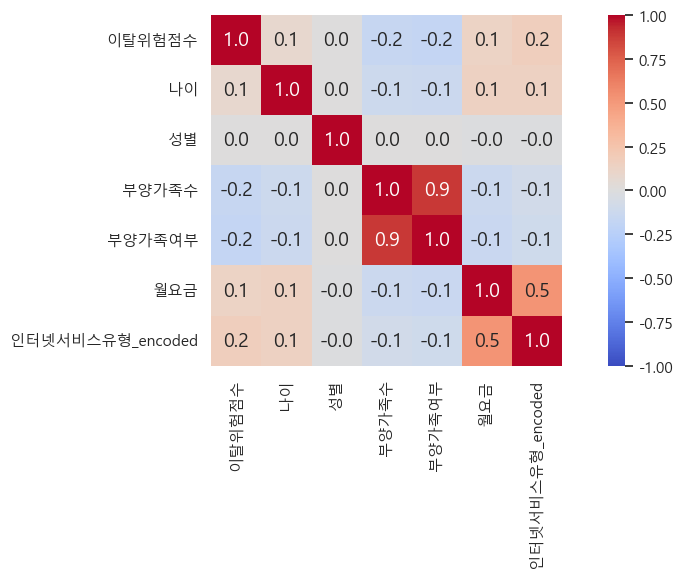

In [81]:
# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.heatmap(
    numeric_risk_data_matrix,
    annot=True,        # 셀 안에 숫자 표시
    fmt=".1f",         # 소수점 1자리까지만 표시
    cmap='coolwarm',   # 음/양 상관을 직관적으로 보여주는 색상
    square=True,       # 셀을 정사각형으로 유지
    vmin=-1, vmax=1    # 색상 범위 고정 (모든 히트맵 비교를 위한 기준)
)
plt.tight_layout()     # 레이아웃 자동 정렬
plt.show()

### 고객 만족도 점수와 부양가족수 / 부양가족 여부/ 나이 / 성별 / 월요금 / 계약기간 / 서비스 유형 과의 관계

In [93]:
# 1️⃣ status에서 고객만족도점수 가져오기
satisfaction_data = status[['고객ID', '고객만족도점수']]

# 2️⃣ demographics에서 나이, 성별, 부양가족수, 부양가족여부 merge
satisfaction_data = pd.merge(
    satisfaction_data,
    demographics[['고객ID', '나이', '성별', '부양가족수', '부양가족여부']],
    on='고객ID'
)

# 3️⃣ services에서 계약기간유형, 월요금 merge
satisfaction_data = pd.merge(
    satisfaction_data,
    services[['고객ID', '계약기간유형', '월요금']],
    on='고객ID'
)

# 4️⃣ tel에서 인터넷서비스유형 merge
satisfaction_data = pd.merge(
    satisfaction_data,
    tel[['고객ID', '인터넷서비스유형']],
    on='고객ID'
)

satisfaction_data.head()

,고객ID,고객만족도점수,나이,성별,부양가족수,부양가족여부,계약기간유형,월요금,인터넷서비스유형
0,8779-QRDMV,3,78,True,0,False,Month-to-Month,39.65,DSL
1,7495-OOKFY,3,74,False,1,True,Month-to-Month,80.65,Fiber optic
2,1658-BYGOY,2,71,True,3,True,Month-to-Month,95.45,Fiber optic
3,4598-XLKNJ,2,78,False,1,True,Month-to-Month,98.50,Fiber optic
4,4846-WHAFZ,2,80,False,1,True,Month-to-Month,76.50,Fiber optic


In [99]:
# Label Encoding (DSL:0, Fiber_optic:1, None:2)
satisfaction_data['인터넷서비스유형_encoded'] = satisfaction_data['인터넷서비스유형'].astype('category').cat.codes

# 숫자형 데이터만 선택 (문자형 변수는 제외)
numeric_satisfaction_data = satisfaction_data.select_dtypes(include=['number', 'bool'])
# 상관계수 행렬 계산
numeric_satisfaction_data_matrix = numeric_satisfaction_data.corr()
# 출력
print(numeric_satisfaction_data_matrix)

                   고객만족도점수        나이        성별     부양가족수    부양가족여부       월요금  \
고객만족도점수           1.000000 -0.085170 -0.003948  0.152873  0.168359 -0.223922   
나이               -0.085170  1.000000  0.002186 -0.119000 -0.125450  0.144685   
성별               -0.003948  0.002186  1.000000  0.005840  0.005229 -0.014569   
부양가족수             0.152873 -0.119000  0.005840  1.000000  0.888234 -0.131837   
부양가족여부            0.168359 -0.125450  0.005229  0.888234  1.000000 -0.144206   
월요금              -0.223922  0.144685 -0.014569 -0.131837 -0.144206  1.000000   
인터넷서비스유형_encoded -0.153953  0.146341 -0.009912 -0.091917 -0.102584  0.530465   

                  인터넷서비스유형_encoded  
고객만족도점수                  -0.153953  
나이                        0.146341  
성별                       -0.009912  
부양가족수                    -0.091917  
부양가족여부                   -0.102584  
월요금                       0.530465  
인터넷서비스유형_encoded          1.000000  


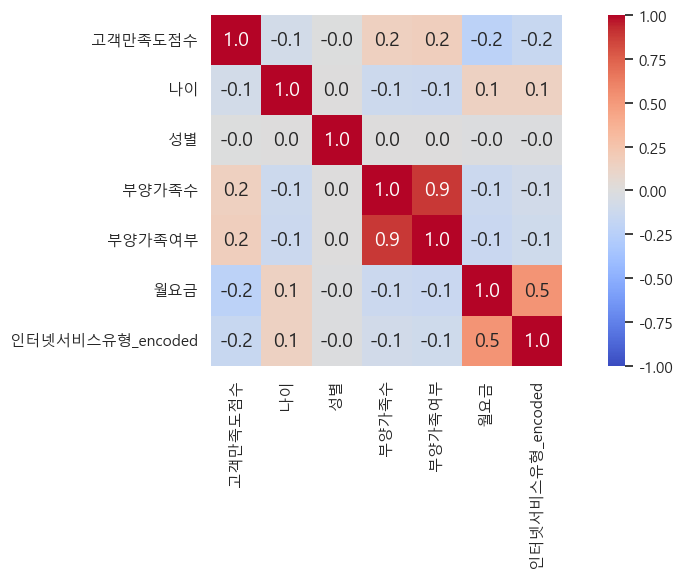

In [102]:
# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.heatmap(
    numeric_satisfaction_data_matrix,
    annot=True,        # 셀 안에 숫자 표시
    fmt=".1f",         # 소수점 1자리까지만 표시
    cmap='coolwarm',   # 음/양 상관을 직관적으로 보여주는 색상
    square=True,       # 셀을 정사각형으로 유지
    vmin=-1, vmax=1    # 색상 범위 고정 (모든 히트맵 비교를 위한 기준)
)
plt.tight_layout()     # 레이아웃 자동 정렬
plt.show()

### 이탈 여부와 부양가족수 /부양가족 여부/ 나이 / 성별 / 월요금 / 계약기간 / 서비스 유형 과의 관계

In [106]:
# 1️⃣ status에서 이탈여부 가져오기
churn_data = status[['고객ID', '이탈여부']]

# 2️⃣ demographics에서 나이, 성별, 부양가족수, 부양가족여부 merge
churn_data = pd.merge(
    churn_data,
    demographics[['고객ID', '나이', '성별', '부양가족수', '부양가족여부']],
    on='고객ID'
)

# 3️⃣ services에서 계약기간유형, 월요금 merge
churn_data = pd.merge(
    churn_data,
    services[['고객ID', '계약기간유형', '월요금']],
    on='고객ID'
)

# 4️⃣ tel에서 인터넷서비스유형 merge
churn_data = pd.merge(
    churn_data,
    tel[['고객ID', '인터넷서비스유형']],
    on='고객ID'
)

# 결과 출력
churn_data.head()

,고객ID,이탈여부,나이,성별,부양가족수,부양가족여부,계약기간유형,월요금,인터넷서비스유형
0,8779-QRDMV,True,78,True,0,False,Month-to-Month,39.65,DSL
1,7495-OOKFY,True,74,False,1,True,Month-to-Month,80.65,Fiber optic
2,1658-BYGOY,True,71,True,3,True,Month-to-Month,95.45,Fiber optic
3,4598-XLKNJ,True,78,False,1,True,Month-to-Month,98.50,Fiber optic
4,4846-WHAFZ,True,80,False,1,True,Month-to-Month,76.50,Fiber optic


In [108]:
# Label Encoding (DSL:0, Fiber_optic:1, None:2)
churn_data['인터넷서비스유형_encoded'] = churn_data['인터넷서비스유형'].astype('category').cat.codes

# 숫자형 데이터만 선택 (문자형 변수는 제외)
numeric_churn_data = churn_data.select_dtypes(include=['number', 'bool'])
# 상관계수 행렬 계산
numeric_churn_data_matrix = numeric_churn_data.corr()
# 출력
print(numeric_churn_data_matrix)

                      이탈여부        나이        성별     부양가족수    부양가족여부       월요금  \
이탈여부              1.000000  0.115760 -0.008612 -0.218780 -0.248542  0.193356   
나이                0.115760  1.000000  0.002186 -0.119000 -0.125450  0.144685   
성별               -0.008612  0.002186  1.000000  0.005840  0.005229 -0.014569   
부양가족수            -0.218780 -0.119000  0.005840  1.000000  0.888234 -0.131837   
부양가족여부           -0.248542 -0.125450  0.005229  0.888234  1.000000 -0.144206   
월요금               0.193356  0.144685 -0.014569 -0.131837 -0.144206  1.000000   
인터넷서비스유형_encoded  0.240810  0.146341 -0.009912 -0.091917 -0.102584  0.530465   

                  인터넷서비스유형_encoded  
이탈여부                      0.240810  
나이                        0.146341  
성별                       -0.009912  
부양가족수                    -0.091917  
부양가족여부                   -0.102584  
월요금                       0.530465  
인터넷서비스유형_encoded          1.000000  


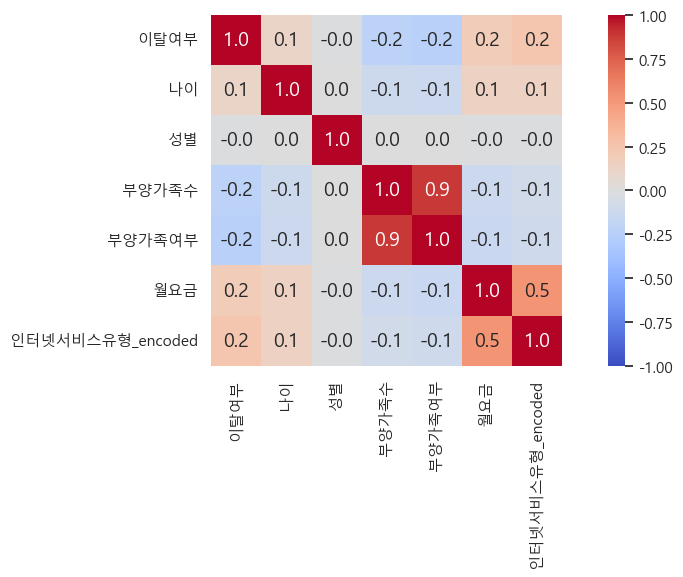

In [110]:
# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.heatmap(
    numeric_churn_data_matrix,
    annot=True,        # 셀 안에 숫자 표시
    fmt=".1f",         # 소수점 1자리까지만 표시
    cmap='coolwarm',   # 음/양 상관을 직관적으로 보여주는 색상
    square=True,       # 셀을 정사각형으로 유지
    vmin=-1, vmax=1    # 색상 범위 고정 (모든 히트맵 비교를 위한 기준)
)
plt.tight_layout()     # 레이아웃 자동 정렬
plt.show()

### 랜덤 포레스트

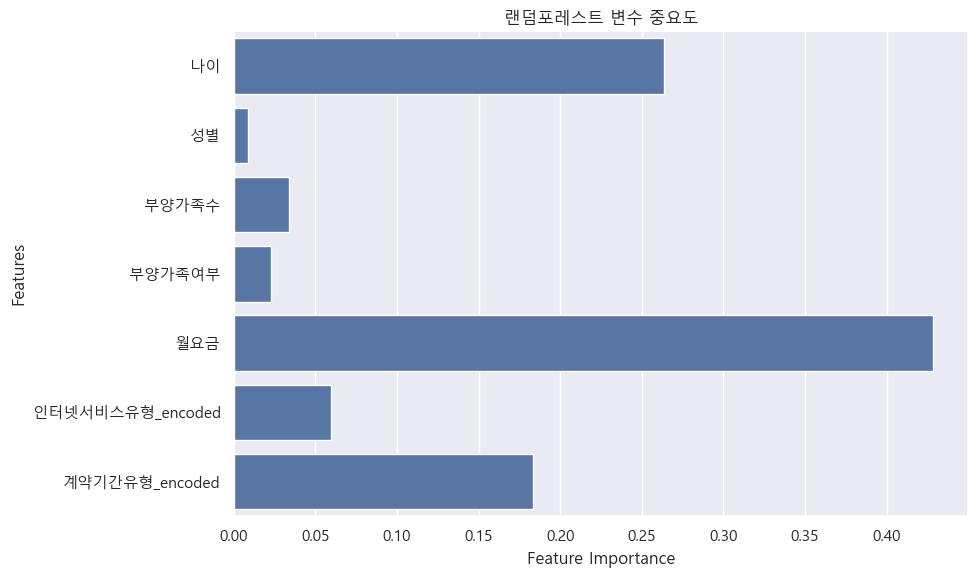

In [113]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Label Encoding (인터넷서비스유형)
churn_data['인터넷서비스유형_encoded'] = churn_data['인터넷서비스유형'].astype('category').cat.codes

# 2️⃣ Label Encoding (계약기간유형)
churn_data['계약기간유형_encoded'] = churn_data['계약기간유형'].astype('category').cat.codes

# 3️⃣ 독립변수(X)와 종속변수(y) 나누기
X = churn_data[['나이', '성별', '부양가족수', '부양가족여부', '월요금', 
                '인터넷서비스유형_encoded', '계약기간유형_encoded']]
y = churn_data['이탈여부']

# 4️⃣ 랜덤포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# 5️⃣ 변수 중요도 출력
importances = model.feature_importances_
feature_names = X.columns

# 6️⃣ 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('랜덤포레스트 변수 중요도')
plt.tight_layout()
plt.show()

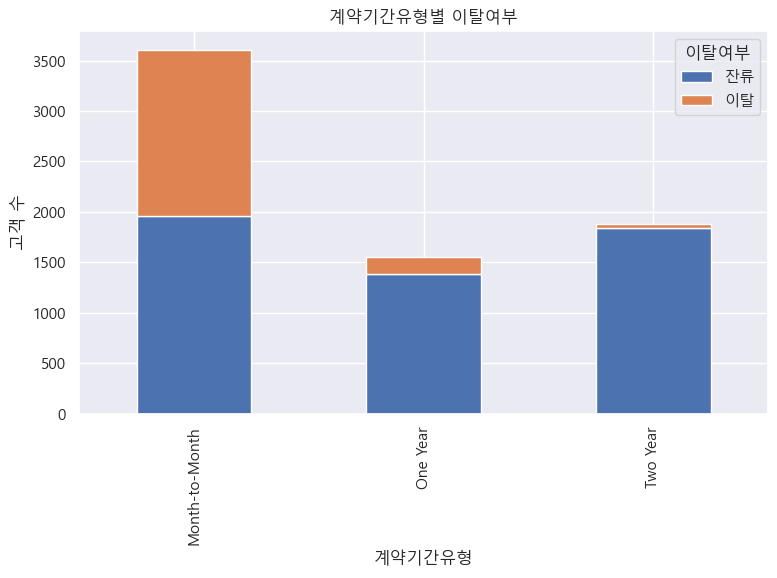

In [127]:
# 계약기간유형 vs 이탈여부 빈도표
contract_churn = pd.crosstab(churn_data['계약기간유형'], churn_data['이탈여부'])

# 시각화
contract_churn.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('계약기간유형별 이탈여부')
plt.xlabel('계약기간유형')
plt.ylabel('고객 수')
plt.legend(title='이탈여부', labels=['잔류', '이탈'])
plt.tight_layout()
plt.show()

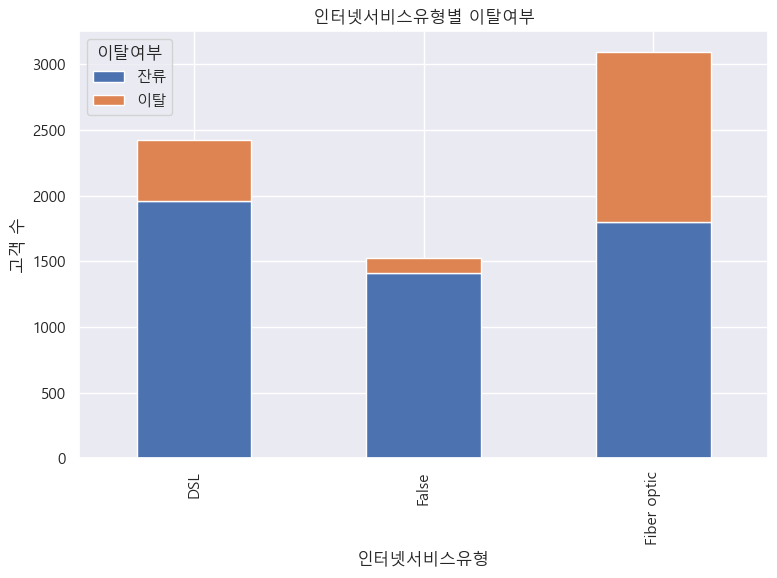

In [133]:
# 인터넷서비스유형 vs 이탈여부 빈도표
internet_churn = pd.crosstab(churn_data['인터넷서비스유형'], churn_data['이탈여부'])

# 시각화
internet_churn.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('인터넷서비스유형별 이탈여부')
plt.xlabel('인터넷서비스유형')
plt.ylabel('고객 수')
plt.legend(title='이탈여부', labels=['잔류', '이탈'])
plt.tight_layout()
plt.show()

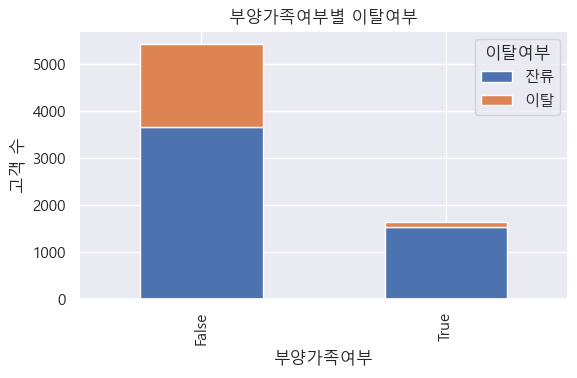

In [135]:
# 부양가족여부 vs 이탈여부 빈도표
dep_churn = pd.crosstab(churn_data['부양가족여부'], churn_data['이탈여부'])

# 시각화
dep_churn.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('부양가족여부별 이탈여부')
plt.xlabel('부양가족여부')
plt.ylabel('고객 수')
plt.legend(title='이탈여부', labels=['잔류', '이탈'])
plt.tight_layout()
plt.show()

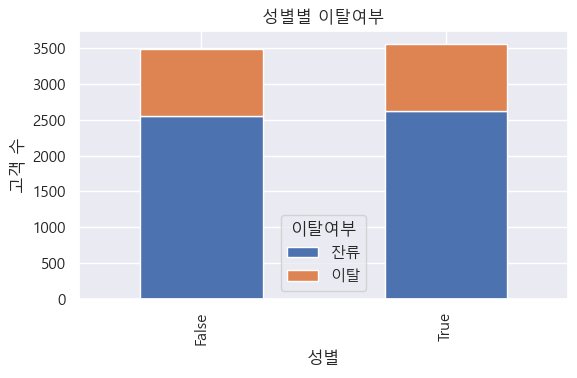

In [137]:
# 성별 vs 이탈여부 빈도표
gender_churn = pd.crosstab(churn_data['성별'], churn_data['이탈여부'])

# 시각화
gender_churn.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('성별별 이탈여부')
plt.xlabel('성별')
plt.ylabel('고객 수')
plt.legend(title='이탈여부', labels=['잔류', '이탈'])
plt.tight_layout()
plt.show()

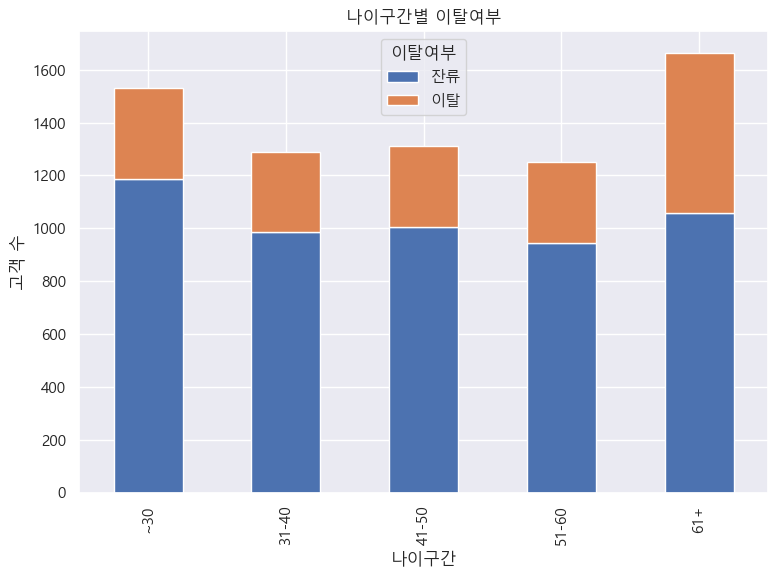

In [139]:
# 나이구간 vs 이탈여부 빈도표
age_churn = pd.crosstab(churn_data['나이구간'], churn_data['이탈여부'])

# 시각화
age_churn.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('나이구간별 이탈여부')
plt.xlabel('나이구간')
plt.ylabel('고객 수')
plt.legend(title='이탈여부', labels=['잔류', '이탈'])
plt.tight_layout()
plt.show()

In [146]:
churn_data.groupby('이탈여부')['월요금'].mean()
churn_data.groupby('이탈여부')['나이'].median()

이탈여부
False    45.0
True     50.0
Name: 나이, dtype: float64

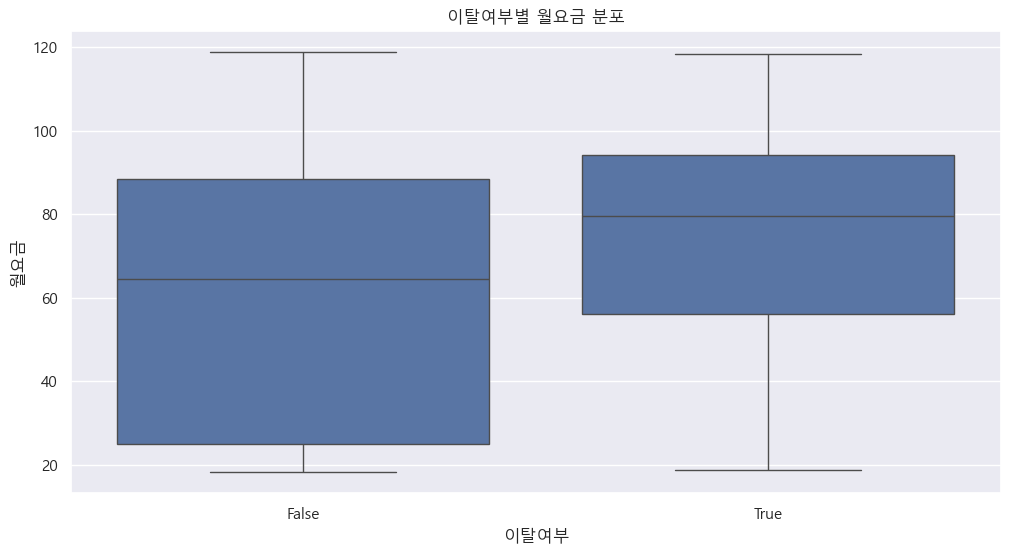

In [148]:
sns.boxplot(x='이탈여부', y='월요금', data=churn_data)
plt.title('이탈여부별 월요금 분포')
plt.xlabel('이탈여부')
plt.ylabel('월요금')
plt.show()

#### 1. 이탈한 사람들의 중앙값이 높은것으로 보아 , 
#### 이탈한 고객들이 월요금을 더 많이 내는 경향이 있다.

#### 2. 이탈한 사람들의 박스 높이가 더 높은것으로 보아 ,
#### 이탈 고객 그룹 내에서 월요금 편차가 더 크다.

#### 3. 이상치는 없다.

In [150]:
from scipy.stats import ttest_ind

# 이탈, 잔류 그룹 나누기
churned = churn_data[churn_data['이탈여부']==True]['월요금']
stayed = churn_data[churn_data['이탈여부']==False]['월요금']

# 독립표본 t-test
t_stat, p_value = ttest_ind(churned, stayed)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

T-statistic: 16.537, p-value: 0.000


#### 왜 60대 이상이 이탈이 높을까?..
#### 여러 데이터들이 있겠지만 우리 데이터셋엔 한계가 있다 . ... . . . .
#### 가지고 있는걸로만 봐야겠지요 ?

#### 나이,성별,부양가족(여부, 수)
#### 1. 더이상 없는걸로 . . . ? 